In [8]:
%reset
%pylab inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Populating the interactive namespace from numpy and matplotlib


In [2]:
import brain_clusters
import os
import pandas as pd
import numpy as np
import pandas as pd
import scipy.io as spio
import matplotlib.gridspec as gridspec
import cPickle as pickle
import scipy.stats as stats
import matplotlib.pyplot as plt

## Correlation between beta weights and prediction score for D,S,R elecs
* for maxes and medians separately

In [47]:
param = 'maxes_rel'

SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = os.path.join(SJdir, 'PCA','Stats','Regression', 'with_stds','all_coefs_withpatterns_withROIs.csv')
df = pd.read_csv(filename)
bad_subjects = ['GP44','ST28','GP27']

df = df[~df.subj.isin(bad_subjects)] #drop bad subjects

#drop EmoRep
df = df[~df.task.isin(['EmoRep'])]

print ('duration %.2f' %(df[[param,'pred_score']][(df.pattern=='D')].corr().iloc[1,0]))
print ('total %.2f' %(df[[param,'pred_score']].corr().iloc[1,0]))

print ('dur significant %.2f' %(df[(df.pval_predscore<0.05) & (df.pattern == 'D')][[param,'pred_score']].corr().iloc[1,0]))

print ('dur nonsignificant %.2f' %(df[(df.pval_predscore>=0.05) & (df.pattern == 'D')][[param,'pred_score']].corr().iloc[1,0]))

print ('SR %.2f' %(df[[param,'pred_score']][(df.pattern=='SR')].corr().iloc[1,0]))
print ('R %.2f' %(df[[param,'pred_score']][(df.pattern=='R')].corr().iloc[1,0]))
print ('S %.2f' %(df[[param,'pred_score']][(df.pattern=='S')].corr().iloc[1,0]))


duration 0.77
total 0.73
dur significant 0.66
dur nonsignificant 0.70
SR -0.03
R 0.12
S 0.27


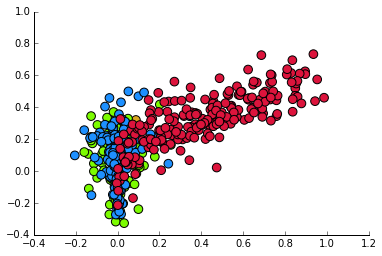

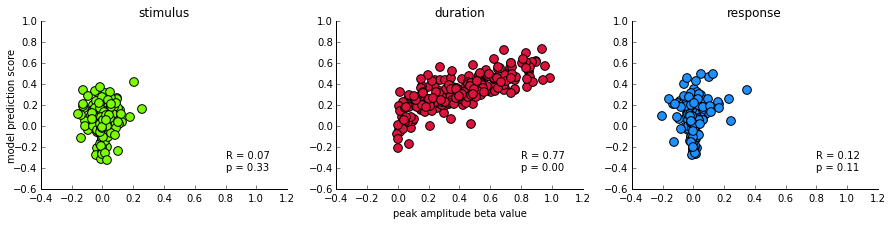

In [48]:
df = df.sort('pattern', ascending = False)

color_dict = {'D':'crimson','R':'dodgerblue', 'S': 'lawngreen', 'SR':'lawngreen', 'sustained':'goldenrod', 'S+sustained':'goldenrod'}
df['color'] = df.pattern.apply(lambda x: color_dict[x])

f, ax = plt.subplots()
ax.scatter(df[param], df.pred_score, color = df.color, s = 75, edgecolor = 'k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

filename= os.path.join(SJdir, 'PCA', 'Results', 'betas_vs_pred_'+param+'_nobadsubj_noEmoRep.png')
plt.savefig(filename, dpi = 300)

#small multiples
f, ax = plt.subplots(1,3, sharey = False, figsize = (15,3))
f.subplots_adjust(hspace = 0.5)

big_ax = f.add_subplot(111)    # The big subplot
big_ax.spines['top'].set_color('none')
big_ax.spines['bottom'].set_color('none')
big_ax.spines['left'].set_color('none')
big_ax.spines['right'].set_color('none')
big_ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
big_ax.set_axis_bgcolor('none') 
big_ax.set_xlabel('peak amplitude beta value')
big_ax.set_ylabel('model prediction score')

ax[1].scatter(df[param][df.pattern == 'D'], df.pred_score[df.pattern == 'D'], color = 'crimson', s = 75, edgecolor= 'k', label = 'duration')
ax[2].scatter(df[param][df.pattern == 'R'], df.pred_score[df.pattern == 'R'], color = 'dodgerblue', s = 75, edgecolor= 'k', label = 'response')
ax[0].scatter(df[param][(df.pattern == 'S') | (df.pattern == 'SR')], df.pred_score[(df.pattern == 'S') | (df.pattern == 'SR')], color = 'lawngreen', s = 75, edgecolor= 'k', label = 'stimulus')
#ax[1,1].scatter(df.maxes_rel[(df.pattern == 'sustained') | (df.pattern == 'S+sustained')], df.pred_score[(df.pattern == 'sustained') | (df.pattern == 'S+sustained')], color = 'goldenrod', s = 75, edgecolor= 'k', label = 'sustained')

title_list = ['stimulus','duration','response']
for i, x in enumerate(ax.flatten()):
    x.spines['top'].set_visible(False)
    x.spines['right'].set_visible(False)
    x.get_xaxis().tick_bottom()
    x.get_yaxis().tick_left()
    x.set_ylim((-0.6,1))
    x.set_xlim((-0.4, 1.2))
    x.set_title(title_list[i])

#add R and p values
text_str = 'R = %.2f\np = %.2f' %stats.pearsonr(df[param][(df.pattern=='S') | (df.pattern == 'SR')], df.pred_score[(df.pattern=='S') | (df.pattern == 'SR')])
ax[0].text(.75,0.1, text_str, transform = ax[0].transAxes, verticalalignment = 'bottom')
    
text_str = 'R = %.2f\np = %.2f' %stats.pearsonr(df[param][(df.pattern=='D')], df.pred_score[(df.pattern == 'D')])
ax[1].text(.75,0.1, text_str, transform = ax[1].transAxes, verticalalignment = 'bottom')

text_str = 'R = %.2f\np = %.2f' %stats.pearsonr(df[param][(df.pattern=='R')], df.pred_score[(df.pattern == 'R')])
ax[2].text(.75,0.1, text_str, transform = ax[2].transAxes, verticalalignment = 'bottom')


filename= os.path.join(SJdir, 'PCA', 'Results', 'betas_vs_pred_'+param+'_subplots_nosustained_nobadsubj_noEmoRep.png')
plt.savefig(filename, dpi = 300)

## Correlation between beta weights and prediction score for Duration elecs with significant prediction scores
* for medians separately

In [16]:
param = 'medians'

SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = os.path.join(SJdir, 'PCA','Stats','Regression', 'with_stds','all_coefs_withpatterns_withROIs.csv')
df = pd.read_csv(filename)
bad_subjects = ['GP44','ST28','GP27']

df = df[~df.subj.isin(bad_subjects)] #drop bad subjects

print ('duration %.2f' %(df[[param,'pred_score']][(df.pattern=='D')].corr().iloc[1,0]))

print ('dur significant %.2f' %(df[(df.pval_predscore<0.05) & (df.pattern == 'D')][[param,'pred_score']].corr().iloc[1,0]))

print ('dur nonsignificant %.2f' %(df[(df.pval_predscore>=0.05) & (df.pattern == 'D')][[param,'pred_score']].corr().iloc[1,0]))



duration -0.28
dur significant -0.49
dur nonsignificant -0.17


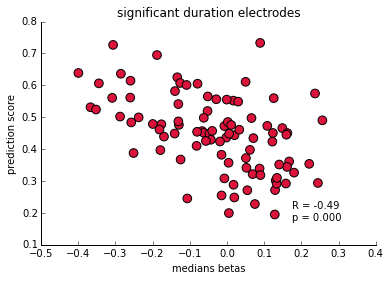

In [23]:
df = df.sort('pattern', ascending = False)

color_dict = {'D':'crimson','R':'dodgerblue', 'S': 'lawngreen', 'SR':'lawngreen', 'sustained':'goldenrod', 'S+sustained':'goldenrod'}
df['color'] = df.pattern.apply(lambda x: color_dict[x])

df_sig = df[(df.pval_predscore<0.05) & (df.pattern == 'D')]

#plot duration significant correlation
f, ax = plt.subplots()
ax.scatter(df_sig[param], df_sig.pred_score, color = df_sig.color, s = 75, edgecolor = 'k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

#add R and p values
text_str = 'R = %.2f\np = %.3f' %stats.pearsonr(df_sig[param], df_sig.pred_score)
ax.text(.75,0.1, text_str, transform = ax.transAxes, verticalalignment = 'bottom')
ax.set_title('significant duration electrodes')  
ax.set_xlabel('%s betas' %(param))
ax.set_ylabel('prediction score')

filename= os.path.join(SJdir, 'PCA', 'Results', 'betas_vs_pred_medians_dur_sig.png')
plt.savefig(filename, dpi = 300)


##correlate coeffients for medians and maxes

In [15]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = os.path.join(SJdir, 'PCA','Stats','Regression', 'with_stds','all_coefs_withpatterns_withROIs.csv')
df = pd.read_csv(filename)
bad_subjects = ['GP44','ST28','GP27']
df = df[~df.subj.isin(bad_subjects)] #drop bad subjects

params = ['maxes_rel','medians']

print ('duration %.2f' %(df[[params[0],params[1]]][(df.pattern=='D')].corr().iloc[1,0]))
print ('total %.2f' %(df[[params[0],params[1]]].corr().iloc[1,0]))
print ('dur significant %.2f' %(df[(df.pval_predscore<0.05) & (df.pattern == 'D')][[params[0],params[1]]].corr().iloc[1,0]))

print ('dur nonsignificant %.2f' %(df[(df.pval_predscore>=0.05) & (df.pattern == 'D')][[params[0],params[1]]].corr().iloc[1,0]))

print ('SR %.2f' %(df[[params[0],params[1]]][(df.pattern=='SR')].corr().iloc[1,0]))
print ('R %.2f' %(df[[params[0],params[1]]][(df.pattern=='R')].corr().iloc[1,0]))
print ('S %.2f' %(df[[params[0],params[1]]][(df.pattern=='S')].corr().iloc[1,0]))

duration -0.11
total -0.14
dur significant -0.13
dur nonsignificant -0.02
SR 0.03
R 0.30
S 0.22


In [14]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = os.path.join(SJdir, 'PCA','Stats','Regression', 'with_stds','all_coefs_withpatterns_withROIs.csv')
df = pd.read_csv(filename)
bad_subjects = ['GP44','ST28','GP27']
df = df[~df.subj.isin(bad_subjects)] #drop bad subjects

params = ['maxes_rel','medians']

print ('duration %.2f' %(df[[params[0],params[1]]][(df.pattern=='D')].corr().iloc[1,0]))
print ('total %.2f' %(df[[params[0],params[1]]].corr().iloc[1,0]))
print ('dur significant %.2f' %(df[(df.pval_predscore<0.05) & (df.pattern == 'D')][[params[0],params[1]]].corr().iloc[1,0]))

print ('dur nonsignificant %.2f' %(df[(df.pval_predscore>=0.05) & (df.pattern == 'D')][[params[0],params[1]]].corr().iloc[1,0]))

print ('SR %.2f' %(df[[params[0],params[1]]][(df.pattern=='SR')].corr().iloc[1,0]))
print ('R %.2f' %(df[[params[0],params[1]]][(df.pattern=='R')].corr().iloc[1,0]))
print ('S %.2f' %(df[[params[0],params[1]]][(df.pattern=='S')].corr().iloc[1,0]))

dur significant -0.13
dur nonsignificant -0.02
SR 0.03
R 0.30
S 0.22


# brain plot

In [3]:
subj = 'GP15'
task = 'EmoGen'
reconfile = 'GP15_Lateral_Left_blankelecs.png'

#open xycoords dictionary                                                                                           
filename = '/home/knight/matar/MATLAB/DATA/Avgusta/Subjs/'+subj+'/xycoords.p'
with open(filename, 'r') as f:
    xycoords = pickle.load(f)
    f.close()

xycoords = pd.DataFrame(np.array(xycoords.values()), columns=['x_2d', 'y_2d'], index=np.array(xycoords.keys())+1)

datadir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
groupidx = '/home/knight/matar/MATLAB/DATA/Avgusta/PCA/duration_dict_500_FINAL/groupidx_activeclusters_hclust_withduration_maxRTlocked_withcriteria.csv'

In [4]:
#color stuff
import matplotlib
#colors = ['lawngreen', 'deepskyblue', 'crimson', 'crimson','crimson']
colors = ['orangered','maroon','darksalmon']

#custom_cmap = matplotlib.colors.ListedColormap(colors, name = 'custom_cmap')

In [5]:
#get subject/task duration R and pvalues - as weights (from groupidx_activeclusters_duration); format as dataframe
df = pd.DataFrame.from_csv(groupidx).reset_index()
subj_task = df[(df.subj.isin([subj])) & (df.task.isin([task]))]
subj_task = subj_task.sort('active_elecs')

#subj_task = subj_task.loc[(subj_task.group == 1) | (subj_task.group == 3) | (subj_task.group == 4)| (subj_task.group == 5)| (subj_task.group == 6)]
subj_task = subj_task.loc[(subj_task.group == 4) | (subj_task.group == 5) | (subj_task.group == 6)]

In [6]:
#stim locked
weights = dict()
dur_clust = dict()

weights = subj_task[['group','active_elecs','all_criteria_passed']].set_index('active_elecs')

#create list of colors for scatter
c = list()
u = np.unique(weights.group)
for i in weights.group:
    idx = np.where(u == i)
    c.append(colors[idx[0]])

zip(weights.group.values, c)

custom_cmap = matplotlib.colors.ListedColormap(c, name = 'custom_cmap')

In [9]:
weights

,group,all_criteria_passed
active_elecs,,
5,4,True
9,5,True
10,4,True
12,6,True
13,4,True
14,6,True
17,5,True
18,4,True
19,5,True


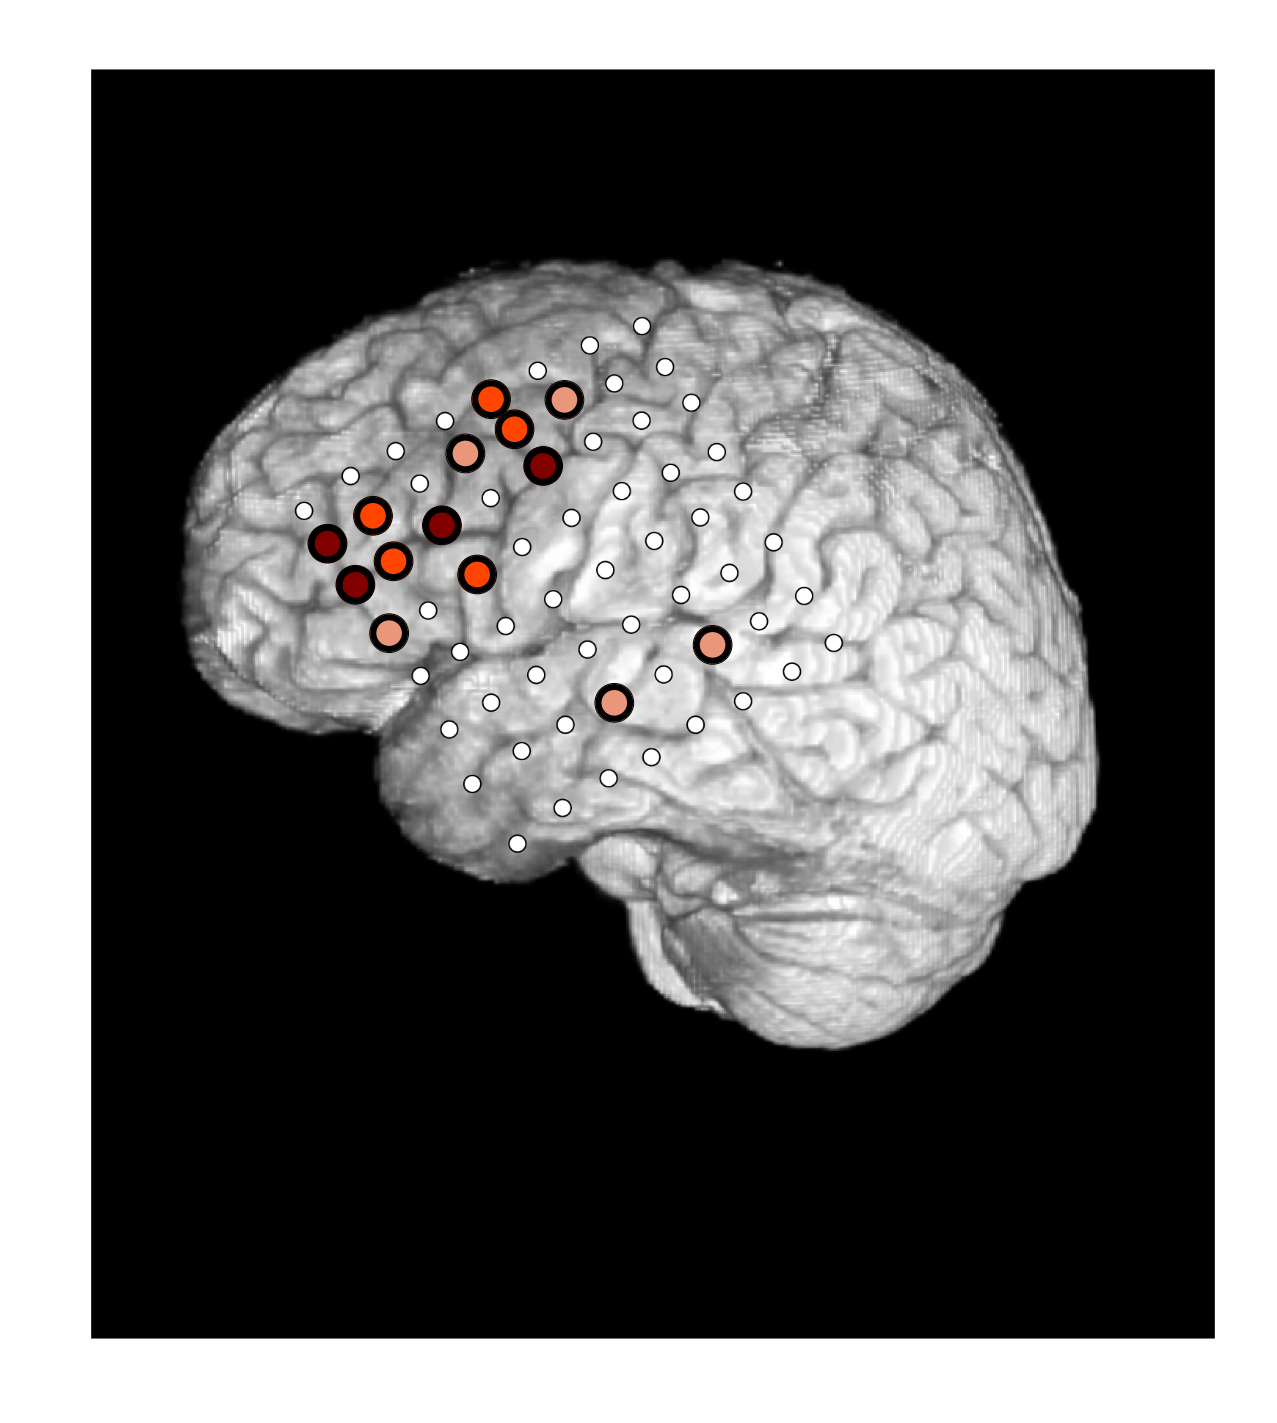

In [63]:
f, ax3 = plt.subplots(figsize = (25,25))

#plot recon
brain_clusters.plot_xy_map(weights['group'], locs = xycoords.loc[weights.index], ax = ax3, szmult=1500, colors = c, cmap = custom_cmap, im_path = os.path.join(datadir,'Subjs', subj, reconfile))    

#outline elecs
x = xycoords.loc[weights.index]['x_2d']
y = xycoords.loc[weights.index]['y_2d']
ax3.scatter(x, y, facecolors = 'None', edgecolor = 'black', s = 1000, linewidth = 6)

#plt.savefig(os.path.join(datadir, 'Subjs', 'GP15','EmoGen', 'stim_resp_dur_clusters.pdf'), transparent=True)
plt.savefig(os.path.join(datadir, 'Subjs', 'GP15','EmoGen', 'dur_clusters_redshades.png'), transparent=True)

## SINGLE TRIALS for 1 subject

In [4]:
import loadmat
from __future__ import division
import os
import numpy as np

In [5]:
#plot single trials for each cluster
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
datadir = os.path.join(SJdir, 'Subjs')

In [6]:
subj = 'GP15'; task = 'EmoGen'

In [7]:
savedir = os.path.join(SJdir, 'PCA', 'SingleTrials_hclust')

g  = 6
onset = 94
offset = 506
filename = os.path.join(savedir, ''.join([subj, '_', task, '_c', str(g)])) 
data_dict = loadmat.loadmat(filename)
cdata = data_dict['cdata']
RTs_all = data_dict['RTs_all']
srate = data_dict['srate']
RTs_all.shape

(882,)

In [8]:
#baseline
bl_st = -500/1000*srate

#cut data
off = 4000/1000*srate

cdata = cdata[:,0:off]
cdata.shape

idx = RTs_all<cdata.shape[1]+bl_st
RTs_all = RTs_all[idx]

cdata = cdata[idx,:]

In [18]:
lats = np.empty_like(RTs_all)
pks = np.empty_like(RTs_all)

In [19]:
#HG onset
for j in np.arange(cdata.shape[0]):
    lats[j] = np.argmax(cdata[j, onset+abs(bl_st):RTs_all[j]+offset])
    pks[j] = np.max(cdata[:, onset+abs(bl_st):RTs_all[j]+offset])

In [23]:
cdata[0,:].argmax()
lats.max()

3027

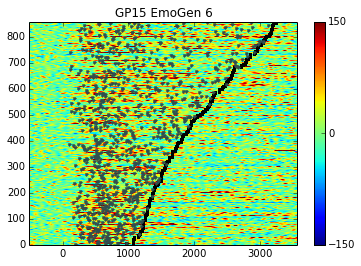

In [28]:
#plot
f,ax = plt.subplots()
ax.set_title(' '.join([subj, task, str(g)]))
ax.autoscale(enable = True, tight = True)
cax = ax.pcolormesh(np.arange(bl_st, cdata.shape[1]+bl_st), np.arange(0, len(RTs_all)), cdata, zorder = 0)
cbar = f.colorbar(cax, ticks = [-150, 0 , 150], orientation = 'vertical')
cax.set_clim(vmin=-150,vmax=150)

for j in np.arange(len(RTs_all)):
    ax.plot((RTs_all[j], RTs_all[j]), (j-0.5, j+0.5), 'k', linewidth = 3,zorder = 1)
    #ax.plot((lats[j]+onset, lats[j]+onset), (j-0.5, j + 0.5), 'darkslategray', linewidth = 3, zorder = 1)
ax.plot(lats+onset, np.arange(len(RTs_all)),'.', color = 'darkslategray', zorder = 1)

filename = os.path.join(SJdir,'PCA','figs_for_Bob', ''.join([subj, '_', task, '_c', str(g), '_withpeaks.png']))
plt.savefig(filename, dpi = 100)

In [383]:
j

857

## SINGLE TRIALS FOR ALL DURATION ELECS

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import loadmat
from __future__ import division
import pandas as pd
import os
import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt

In [14]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
subj = 'GP15'
task = 'EmoGen'
g = 1
RTs = list()

In [15]:
df = pd.read_csv(os.path.join(SJdir, 'PCA', 'duration_dict_500_FINAL', 'groupidx_activeclusters_hclust_withduration_maxRTlocked_withcriteria.csv'))

In [16]:
df_dur = df.loc[df.all_criteria_passed == True, ['subj','task','group']].drop_duplicates(['subj','task','group'])

In [17]:
df_dur = df_dur[df_dur['subj']!='GP27']
df_dur = df_dur[df_dur['subj']!='ST28']

In [18]:
df_dur.shape

(46, 3)

In [19]:
cdata_all = pd.DataFrame()

In [ ]:
#TRY MIGHT BE FASTER - otherwise use numpy array, not df
rows_list = []
for r in df_dur.itertuples():
    _, subj, task, g = r
    
    filename = os.path.join(SJdir, 'PCA', 'SingleTrials_hclust', ''.join([subj,'_',task, '_c', str(int(g)), '.mat']))
    data_dict = loadmat.loadmat(filename)
    cdata = data_dict['cdata']
    RTs_all = data_dict['RTs_all']
    
    dict1 = {'cdata':cdata,'RTs_all':RTs_all}
    rows_list.append(dict1)

df = pd.DataFrame(rows_list) 

In [126]:
tmpa = list(); tmpb = list()
for r in df_dur.itertuples():
    _, subj, task, g = r
    
    filename = os.path.join(SJdir, 'PCA', 'SingleTrials_hclust', ''.join([subj,'_',task, '_c', str(int(g)), '.mat']))
    data_dict = loadmat.loadmat(filename)
    cdata = data_dict['cdata']
    RTs_all = data_dict['RTs_all']
    
    tmpa.append(cdata.shape[0])
    tmpb.append(cdata.shape[1])
    cdata_all = cdata_all.append(pd.DataFrame(cdata, index = RTs_all))
    
    print (cdata.shape[1], subj, task, g)

(3965, 'JH10', 'SelfAud', 5)
(3118, 'JH17', 'SelfVis', 5)
(3158, 'JH2', 'SelfAud', 4)
(5362, 'CP7', 'DecisionAud', 5)
(2986, 'GP15', 'SelfVis', 6)
(6343, 'ST1', 'EmoGen', 1)
(4969, 'JH6', 'SelfAud', 1)
(3829, 'JH17', 'SelfAud', 5)
(3661, 'JH2', 'SelfVis', 5)
(3661, 'JH2', 'SelfVis', 4)
(3969, 'ST15', 'SelfAud', 4)
(2472, 'GP15', 'EmoRep', 3)
(4905, 'ST1', 'SelfAud', 1)
(2089, 'JH2', 'FaceEmo', 2)
(2211, 'GP15', 'FaceGen', 2)
(4751, 'JH2', 'EmoGen', 3)
(2661, 'JH5', 'EmoRep', 4)
(2986, 'GP15', 'SelfVis', 4)
(3530, 'ST27', 'DecisionVis', 4)
(2386, 'GP35', 'EmoRep', 4)
(3118, 'JH17', 'SelfVis', 3)
(2273, 'GP15', 'FaceEmo', 3)
(3720, 'GP28', 'SelfAud', 4)
(2089, 'JH2', 'FaceEmo', 3)
(2442, 'ST4', 'EmoRep', 2)
(4969, 'JH6', 'SelfAud', 3)
(4958, 'GP15', 'EmoGen', 4)
(3739, 'GP35', 'EmoGen', 4)
(4958, 'GP15', 'EmoGen', 6)
(2273, 'GP15', 'FaceEmo', 2)
(4958, 'GP15', 'EmoGen', 5)
(3016, 'ST32', 'DecisionVis', 6)
(2211, 'GP15', 'FaceGen', 1)
(2089, 'JH2', 'FaceEmo', 4)
(3016, 'ST32', 'DecisionVi

In [127]:

#save for later use
cdata_dict = {'cdata_all': cdata_all}
data_path = os.path.join(SJdir, 'PCA', 'SingleTrials_hclust', 'cdata_all_noGP27_noST28.p')

with open(data_path, 'w') as f:
    pickle.dump(cdata_dict, f)
    f.close()

In [20]:
#load data
data_path = os.path.join(SJdir, 'PCA', 'SingleTrials_hclust', 'cdata_all_noGP27_noST28.p')

cdata_dict = pickle.load( open( data_path, "rb" ) )

In [21]:
cdata_all = cdata_dict['cdata_all']

In [22]:
cdata_all.shape

(34978, 6343)

In [23]:
cdata_cut = cdata_all.ix[:,0:3000]

In [24]:
cdata_cut = cdata_cut.sort_index(inplace=False)
cdata_cut.shape

(34978, 3001)

In [25]:
cdata_cut = cdata_cut.fillna(0)

In [26]:
RTs_all = cdata_cut.index.values
RTs_all = np.array([x+500 for x in RTs_all])
goodidx = RTs_all<3000
RTs_all = RTs_all[goodidx]

In [27]:
RTs_all.shape
max(RTs_all)

2998

In [28]:
cdata_cut = np.array(cdata_cut)
cdata_cut = np.array(cdata_cut[goodidx,:])

In [29]:
cdata_cut.shape

(32389, 3001)

In [30]:
filename = os.path.join(SJdir, 'PCA', 'figs_for_Bob', 'singletrials_allduration_noGP27_noST28_300.png')
filename

'/home/knight/matar/MATLAB/DATA/Avgusta/PCA/figs_for_Bob/singletrials_allduration_noGP27_noST28.pdf'

In [31]:
RTs_all = RTs_all-500

In [32]:
filename

'/home/knight/matar/MATLAB/DATA/Avgusta/PCA/figs_for_Bob/singletrials_allduration_noGP27_noST28.pdf'

MemoryError: 

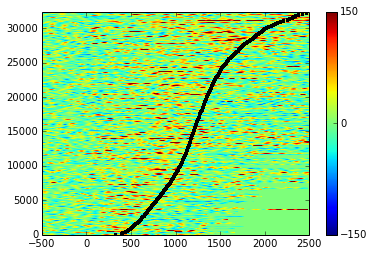

In [33]:
f,ax = plt.subplots()
ax.autoscale(enable = True, tight = True)
cax = ax.pcolormesh(np.arange(-500, cdata_cut.shape[1]-500), np.arange(0, len(RTs_all)), cdata_cut, zorder = 0)
cbar = f.colorbar(cax, ticks = [-150, 0 , 150], orientation = 'vertical')
cax.set_clim(vmin=-150,vmax=150)

for j in np.arange(len(RTs_all)):
    ax.plot((RTs_all[j], RTs_all[j]), (j-0.5, j+0.5), 'k', linewidth = 3,zorder = 1)
    
plt.savefig(filename, dpi = 300)

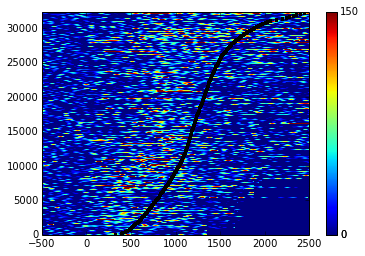

In [200]:
#different scaling
filename = os.path.join(SJdir, 'PCA', 'figs_for_Bob', 'singletrials_allduration_100.png')

f,ax = plt.subplots()
ax.autoscale(enable = True, tight = True)
cax = ax.pcolormesh(np.arange(-500, cdata_cut.shape[1]-500), np.arange(0, len(RTs_all)), cdata_cut, zorder = 0)
cbar = f.colorbar(cax, ticks = [0, 0 , 150], orientation = 'vertical')
cax.set_clim(vmin=0,vmax=150)

for j in np.arange(len(RTs_all)):
    ax.plot((RTs_all[j], RTs_all[j]), (j-0.5, j+0.5), 'k', linewidth = 3,zorder = 1)
    
plt.savefig(filename)

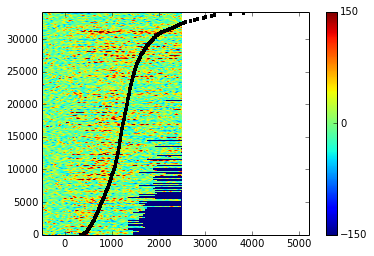

In [85]:
f,ax = plt.subplots()
ax.autoscale(enable = True, tight = True)
cax = ax.pcolormesh(np.arange(-500, cdata_cut.shape[1]-500), np.arange(0, len(RTs_all)), cdata_cut, zorder = 0)
cbar = f.colorbar(cax, ticks = [-150, 0 , 150], orientation = 'vertical')
cax.set_clim(vmin=-150,vmax=150)

for j in np.arange(len(RTs_all)):
    ax.plot((RTs_all[j], RTs_all[j]), (j-0.5, j+0.5), 'k', linewidth = 3,zorder = 1)


## RT histograms

In [24]:
%reset
%pylab inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Populating the interactive namespace from numpy and matplotlib


In [25]:
import loadmat
import brewer2mpl
from __future__ import division
import os
import pandas as pd
import glob
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [26]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
reconlist = os.path.join(SJdir, 'PCA', 'reconlist_pruned.csv')
reconlist = pd.read_csv(reconlist)

In [27]:
filename = os.path.join(SJdir,'PCA', 'RTs','RT_summary_offsets.csv')
dfRT = pd.read_csv(filename)

In [28]:
tmp = dfRT.groupby('task').mean().sort('RTs_mean')
tmp['RTs_mean']

task
FaceGen         326.972271
FaceEmo         343.521582
DecisionVis     362.477948
EmoRep          450.391355
DecisionAud     970.304267
SelfAud        1005.175139
SelfVis        1060.270927
EmoGen         1408.861925
Name: RTs_mean, dtype: float64

In [29]:
stim_dur_dict = {'DecisionAud':600, 'DecisionVis':500, 'FaceEmo':300, 'FaceGen':300, 'SelfVis':400}
#from offset
dfall = pd.DataFrame()
df = pd.DataFrame()
for x in reconlist.values:
    subj_task, recon, _,srate, _ = x
    
    if (isinstance(recon, float)): #no recon
        continue
        
    subj, task = subj_task.split('_')

    #load onsets_stim and onsets_resp
    filenames = glob.glob(os.path.join(SJdir, 'Subjs', subj, task, 'onsets*.mat'))
    filenames = [s for s in filenames if 'empty' not in s]
    
    data_dict = dict()
    for f in filenames:
        data_dict.update(loadmat.loadmat(f))
        
    varnames = [x.split('/')[-1].split('.')[0] for x in filenames]
    varnames.remove('onsets_cue') if 'onsets_cue' in varnames else 1 #drop onsets_cue for my data
    
    #assign onsets_stim and _resp to correct variables (hacky because of weird naming structure in orig data)
    idx = ['resp' in x for x in varnames]
    idx_resp = [i for i, elem in enumerate(idx) if elem][0]
    idx_stim = [i for i, elem in enumerate(idx) if not(elem)][0]

    tmp = [data_dict.get(k) for k in varnames]
    onsets_resp = tmp[idx_resp]
    onsets_stim = tmp[idx_stim]
    
    RTs = onsets_resp - onsets_stim
    goodidx = (RTs > (RTs.mean() - 3 * RTs.std())) & (RTs < RTs.mean() + 3 * RTs.std())
    onsets_resp = onsets_resp[goodidx]
    onsets_stim = onsets_stim[goodidx]
        
    onsets_resp = onsets_resp/srate*1000
    onsets_stim = onsets_stim/srate*1000
    
    #load stimulus duration for auditory tasks with variable durations
    if (task == 'SelfAud') | (task == 'EmoRep') | (task == 'EmoGen'):
        filename = os.path.join(SJdir, 'Subjs', subj, task, 'stim_dur.mat')
        data_dict = loadmat.loadmat(filename)
        stim_dur = data_dict['stim_dur']
        stim_dur = stim_dur[goodidx]
    else:
        stim_dur = np.tile(stim_dur_dict[task], onsets_stim.size)

    
    RT_offsets = onsets_resp - (onsets_stim + stim_dur)
    
    df = pd.DataFrame({'subj': np.tile(subj, RT_offsets.shape), 'task':np.tile(task, RT_offsets.shape), 'RTs':RT_offsets})
    dfall = dfall.append(df)

In [30]:
np.unique(dfall.subj)

array(['CP7', 'CP9', 'GP15', 'GP28', 'GP35', 'JH10', 'JH17', 'JH2', 'JH5',
       'JH6', 'ST1', 'ST15', 'ST27', 'ST32', 'ST4', 'ST6'], dtype=object)

In [31]:

#drop EmoRep
#dfall = dfall[dfall.task != 'EmoRep']

In [32]:
#create dataframe
RTs_n = list(); RTs_mean = list(); RTs_std = list(); RTs_range = list(); RTs_skew = list(); subjs = list(); tasks = list()

for r in dfall.groupby(['subj','task']):
    s, t = r[0]
    RTs = r[1]['RTs']
    RTs_mean.append(RTs.mean())
    RTs_std.append(RTs.std())
    RTs_range.append((max(RTs)-min(RTs)))
    RTs_skew.append(stats.kurtosis(RTs))
    RTs_n.append(len(RTs))
    subjs.append(s)
    tasks.append(t)

df = pd.DataFrame()
df['subj'] = subjs
df['task'] = tasks
df['RTs_mean'] = RTs_mean
df['RTs_std'] = RTs_std
df['RTs_range'] = RTs_range
df['RTs_skew'] = RTs_skew



In [33]:
tmp = df.groupby('task').mean().sort('RTs_mean')
tmp['RTs_mean']

task
DecisionVis     265.509809
FaceGen         326.972271
FaceEmo         343.521582
EmoRep          474.901550
DecisionAud     954.727233
SelfAud        1044.463068
SelfVis        1060.270927
EmoGen         1408.861925
Name: RTs_mean, dtype: float64

In [34]:
df.groupby('task').mean().loc['DecisionAud']['RTs_mean']

954.72723325062043

In [35]:
df.groupby('task').count()

,subj,RTs_mean,RTs_std,RTs_range,RTs_skew
task,,,,,
DecisionAud,2,2,2,2,2
DecisionVis,2,2,2,2,2
EmoGen,4,4,4,4,4
EmoRep,8,8,8,8,8
FaceEmo,4,4,4,4,4
FaceGen,2,2,2,2,2
SelfAud,10,10,10,10,10
SelfVis,5,5,5,5,5


In [36]:
len(df.groupby('subj').count().index)

16

In [37]:
num_tasks = len(df.groupby('task').count().index)

In [38]:
names_dict = {'DecisionAud' : 'Categorization\nAuditory', \
              'DecisionVis' : 'Categorization\nVisual', \
             'EmoGen' : 'Antonym\nGeneration', \
             'EmoRep' : 'Word\nRepetition', \
             'FaceEmo' :'Face Emotion\nDiscrimination', \
             'FaceGen' : 'Face Gender\nDiscrimination', \
             'SelfAud' : 'Self Referential\nAuditory', \
             'SelfVis' : 'Self Referential\nVisual'}

In [40]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.transforms import blended_transform_factory

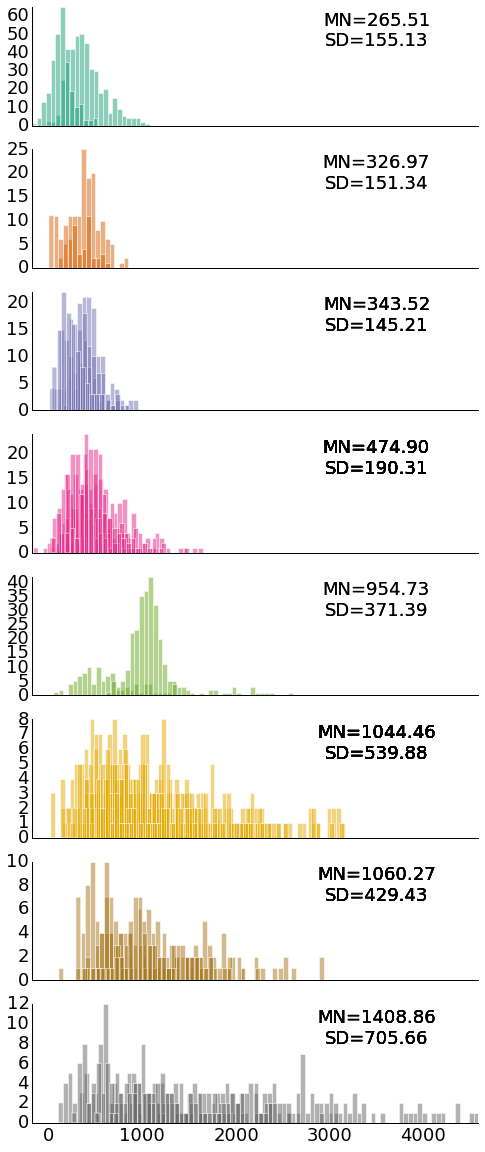

In [47]:
set2 = brewer2mpl.get_map('Dark2', 'Qualitative', num_tasks).mpl_colors
fig, ax = plt.subplots(num_tasks,sharex=True, figsize = (8, 20),subplot_kw=dict(axisbg='#EEEEEE'))
plt.tight_layout

left, width = .25, .75
bottom, height = .25, .70
right = left + width
top = bottom + height


for i, t in enumerate(tmp.index):
    ax[i].patch.set_facecolor('white')

    ax[i].autoscale(tight=True)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].yaxis.set_tick_params(labelsize = 18, width = 0)
    ax[i].xaxis.set_tick_params(labelsize = 18, width = 0)
    #majorLocator   = MultipleLocator(5)
    #majorFormatter = FormatStrFormatter('%d')
    
    #ax[i].yaxis.set_major_locator(majorLocator)
    #ax[i].yaxis.set_major_formatter(majorFormatter)

#     ax[i].text(right, top, names_dict[t],
#             horizontalalignment='right',
#             verticalalignment='top',
#             transform=ax[i].transAxes, fontsize = 24, weight = 'bold')    
    
    #ax[i].set_ylabel('Trials', fontsize = 24, weight = 'bold')
    
    
for i, task in enumerate(tmp.index): #ordered by increasing mean
    data = dfall.loc[dfall['task'] == task].dropna()
    
    for s in data.groupby('subj'):
        data = s[1]['RTs']
        binwidth = 50
        ax[i].hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), color = set2[i], alpha = 0.5, edgecolor = 'white')
        #x = s[1]['RTs'].hist(ax = ax[i], alpha = 0.5, grid = False, xlabelsize= 20, ylabelsize = 16, edgecolor = 'white', label = s[0])
        #x.legend()
        mn = df.groupby('task').mean().loc[task]['RTs_mean']
        sd = df.groupby('task').mean().loc[task]['RTs_std']
        label = 'MN=%.2f\nSD=%.2f' %(mn, sd)
        
        tform = blended_transform_factory(ax[i].transData, ax[i].transAxes)
        ax[i].annotate(label, xy=(3500, 0), xycoords=tform, 
            xytext=(3500, 0.8), textcoords=tform, fontsize=18,
            ha='center', va='center')
                
plt.savefig(os.path.join(SJdir, 'PCA', 'Figures','RT_hists_alpha_offset_nolabel.png'), transparent = True)        

In [29]:
#from onset

dfall = pd.DataFrame()
df = pd.DataFrame()
for x in reconlist.values:
    subj_task, recon, _, _, _ = x
    if (isinstance(recon, float)): #no recon
        continue
    subj, task = subj_task.split('_')

    filename = os.path.join(SJdir, 'Subjs', subj, task, 'HG_elecMTX_percent.mat')
    data = loadmat.loadmat(filename)
    srate = data['srate']
    RT = data['RTs'].flatten()/srate*1000 #convert to ms
    
    if task == 'DecisionAud': #shift by cue (HGmtx includes cue in RT for plotting)
        RT = RT - 600
    if task == 'DecisionVis':
        RT = RT - 500
    
    df = pd.DataFrame({'subj': np.tile(subj, RT.shape), 'task':np.tile(task, RT.shape), 'RTs':RT})
    dfall = dfall.append(df)

In [46]:
tmp_n = dfall
tmp_n.drop_duplicates(['subj','task']).groupby('task').count()

,RTs,subj
task,,
DecisionAud,3,3
DecisionVis,3,3
EmoGen,4,4
EmoRep,9,9
FaceEmo,4,4
FaceGen,2,2
SelfAud,11,11
SelfVis,5,5


## coverage all elecs

In [77]:
#find subj that only has EmoRep (JH5)
df = dfall.drop_duplicates(['subj','task'])[['subj','task']]
emorep_subjs = df[df.task == 'EmoRep']
for s in list(emorep_subjs.subj):
    tasks = df[df.subj == s].task
    if len(tasks)==1:
        print (s, tasks)

('JH5', 0    EmoRep
Name: task, dtype: object)


In [237]:
filename = os.path.join(SJdir, 'Subjs','coverage_allelecs.csv')
df = pd.read_csv(filename)

bad_subjects = ['GP44','ST28','GP27']

df = df[df.subj.apply(lambda x: not(x in bad_subjects))]
total_coverage = df['elec'].count() #no GP44
print total_coverage

df = df[df.subj != 'JH5']
no_emorep_coverage = df['elec'].count() #no bad subject AND no EmoRep
print no_emorep_coverage

1548
1498


## number of active electrodes (pre-clustering)

In [241]:
filename= os.path.join(SJdir, 'PCA','ShadePlots_allelecs_June25', 'shadeplots_stim_bigwindow.csv')
df = pd.read_csv(filename)

bad_subjects = ['GP44','ST28','GP27']

In [242]:
#drop GP44, ST28, GP27
df = df[df.subj.apply(lambda x: not(x in bad_subjects))]
active = df['elec'].count()
print (active, active/total_coverage)

#drop bad subjects and EmoRep
df = df[df.task != 'EmoRep']
active_no_emorep = df['elec'].count() #no bad subjects AND no EmoRep
print (active_no_emorep, active_no_emorep/no_emorep_coverage)

(1077, 0.69573643410852715)
(869, 0.58010680907877166)


## total number of clusters, duration elecs proportions

In [266]:
import os
import pandas as pd
import loadmat

In [263]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'

In [264]:
def get_ROI(subj, e, brain_ROI, task = None):
    '''
    Returns an ROI for a given subj and elec.
    If subject is GP35 then must give a task argument so knows which ROIs to pull
    '''
    
    if (subj == 'GP35') & ((task == 'EmoRep') | (task == 'EmoGen')):
        subj = 'GP35_words'
    elif (subj == 'GP35') & ((task == 'FaceEmo') | (task == 'FaceGen')):
        subj = 'GP35_face'
    
    try:
        rois = brain_ROI[subj]
    except:
        return None
    else:
        for roi, elecs in rois.iteritems():
            if np.in1d(e, elecs):
                return roi

In [286]:
## add ROIs
filename = os.path.join(SJdir, 'PCA', 'Stats', 'single_electrode_windows_withdesignation_EDITED_dropped.csv')
df = pd.read_csv(filename)

filename = 'brain_ROI.mat'
filename = os.path.join(SJdir, 'ROIs', 'brain_ROI.mat')
data = loadmat.loadmat(filename)
brain_ROI = data['brain_ROI']

df['ROI'] = df.apply(lambda x:get_ROI(x.subj, x.elec, brain_ROI, task = x.task), axis = 1)

col_list = list(df.columns)
col_list.pop(col_list.index('Unnamed: 0'))
col_list.pop(col_list.index('Unnamed: 0.1'))
col_list.pop(col_list.index('Unnamed: 10'))
col_list.pop(col_list.index('Unnamed: 11'))
df = df[col_list]

filename = os.path.join(SJdir, 'PCA', 'Stats', 'single_electrode_windows_withdesignation_EDITED_dropped_withROI.csv')
df.to_csv(filename, index = False)

In [287]:
print 'ALL DATA'
print "total clusters"
print df.drop_duplicates(['subj','task','cluster']).shape #total number of clusters
tmp = df.drop_duplicates(['subj','task','cluster'])
print "number of duration clusters"
print tmp[tmp.pattern == 'D'].shape #number of duration clusters
print "number of elecs in duration clusters"
print df[df.pattern=='D'].shape #number of electrdoes in duration clusters

ALL DATA
total clusters
(177, 11)
number of duration clusters
(50, 11)
number of elecs in duration clusters
(283, 11)


In [250]:
print "drop GP44, ST28, GP27"
df = df[df.subj.apply(lambda x: not(x in bad_subjects))]

print "total clusters"
print df.drop_duplicates(['subj','task','cluster']).shape #total number of clusters
tmp = df.drop_duplicates(['subj','task','cluster'])
print "number of duration clusters"
print tmp[tmp.pattern == 'D'].shape #number of duration clusters
print "number of elecs in duration clusters"
print df[df.pattern=='D'].shape #number of electrdoes in duration clusters

print ' '

#drop bad subjects and EmoRep
df = df[df.task != 'EmoRep'] #drop EmoRep
print "drop GP44, ST28, GP27 & EmoRep"
print "total clusters"
print df.drop_duplicates(['subj','task','cluster']).shape #total number of clusters
tmp = df.drop_duplicates(['subj','task','cluster'])
print "number of duration clusters"
print tmp[tmp.pattern == 'D'].shape #number of duration clusters
print "number of elecs in duration clusters"
print df[df.pattern=='D'].shape #number of electrdoes in duration clusters


drop GP44, ST28, GP27
total clusters
(151, 11)
number of duration clusters
(45, 11)
number of elecs in duration clusters
(246, 11)
 
drop GP44, ST28, GP27 & EmoRep
total clusters
(122, 11)
number of duration clusters
(41, 11)
number of elecs in duration clusters
(221, 11)


In [289]:
print ' '
bad_subjects = ['GP44','ST28','GP27']
#calculate proportions per ROI
filename = os.path.join(SJdir, 'PCA', 'Stats', 'single_electrode_windows_withdesignation_EDITED_dropped_withROI.csv')
df = pd.read_csv(filename)

right = ['R_ATL', 'R_FrPole', 'R_IFG', 'R_IPL', 'R_InfTemp', 'R_MFG', 'R_MFG_prem', 'R_MFG_premot', 'R_MTG',
       'R_MedOccip', 'R_MedParietal', 'R_Post_centrl', 'R_PreSMA','R_Pre_centrl', 'R_SMA', 'R_STG', 'R_dACC']

frontal = ['Broca','FrPole','IFG','MFG','MFG_premot', 'MFG_prem', 'OFC', 'PreSMA','Pre_centrl','SFG','preSMA']

mfg = ['MFG','MFG_premot', 'MFG_prem']


#LEFT hemisphere
#how many active elecs are duration elecs
print 'left'
Ldf = df[df.ROI.apply(lambda x: not(x in right))]
print (Ldf.query("pattern == 'D'").shape[0], Ldf.shape[0], Ldf.query("pattern == 'D'").shape[0]/Ldf.shape[0])

Ldf = Ldf[Ldf.subj.apply(lambda x: not(x in bad_subjects))] #drop bad subjects
print (Ldf.query("pattern == 'D'").shape[0], Ldf.shape[0], Ldf.query("pattern == 'D'").shape[0]/Ldf.shape[0])

Ldf = Ldf[Ldf.task != 'EmoRep'] #drop EmoRep
print (Ldf.query("pattern == 'D'").shape[0], Ldf.shape[0], Ldf.query("pattern == 'D'").shape[0]/Ldf.shape[0])
print ' '

#LEFT FRONTAL
print '(left) frontal'
Ldf_frontal = df[df.ROI.apply(lambda x: x in frontal)]
print (Ldf_frontal.query("pattern == 'D'").shape[0], Ldf_frontal.shape[0], Ldf_frontal.query("pattern == 'D'").shape[0]/Ldf_frontal.shape[0])

Ldf_frontal = Ldf_frontal[Ldf_frontal.subj.apply(lambda x: not(x in bad_subjects))] #drop bad subjects
print (Ldf_frontal.query("pattern == 'D'").shape[0], Ldf_frontal.shape[0], Ldf_frontal.query("pattern == 'D'").shape[0]/Ldf_frontal.shape[0])

Ldf_frontal = Ldf_frontal[Ldf_frontal.task != 'EmoRep'] #drop EmoRep
print (Ldf_frontal.query("pattern == 'D'").shape[0], Ldf_frontal.shape[0], Ldf_frontal.query("pattern == 'D'").shape[0]/Ldf_frontal.shape[0])
print ' '

## LEFT MFG
print '(left) MFG'
Ldf_MFG = df[df.ROI.apply(lambda x: x in mfg)]
print (Ldf_MFG.query("pattern == 'D'").shape[0], Ldf_MFG.shape[0], Ldf_MFG.query("pattern == 'D'").shape[0]/Ldf_MFG.shape[0])

Ldf_MFG = Ldf_MFG[Ldf_MFG.subj.apply(lambda x: not(x in bad_subjects))] #drop bad subjects
print (Ldf_MFG.query("pattern == 'D'").shape[0], Ldf_MFG.shape[0], Ldf_MFG.query("pattern == 'D'").shape[0]/Ldf_MFG.shape[0])

Ldf_MFG = Ldf_MFG[Ldf_MFG.task != 'EmoRep'] #drop EmoRep
print (Ldf_MFG.query("pattern == 'D'").shape[0], Ldf_MFG.shape[0], Ldf_MFG.query("pattern == 'D'").shape[0]/Ldf_MFG.shape[0])
print ' '

## Right hemisphere duration
print 'right'
Rdf = df[df.subj.apply(lambda x: not(x in bad_subjects))] #drop bad subjects
Rdf = Rdf[Rdf.ROI.apply(lambda x: x in right)]
print (Rdf.query("pattern == 'D'").shape[0], Rdf.shape[0], Rdf.query("pattern == 'D'").shape[0]/Rdf.shape[0])



 
left
(275, 871, 0.3157290470723307)
(240, 681, 0.3524229074889868)
(216, 543, 0.39779005524861877)
 
(left) frontal
(179, 370, 0.4837837837837838)
(163, 286, 0.5699300699300699)
(149, 240, 0.6208333333333333)
 
(left) MFG
(52, 90, 0.5777777777777777)
(49, 74, 0.6621621621621622)
(47, 65, 0.7230769230769231)
 
right
(6, 100, 0.06)


In [253]:
bad_subjects

['GP44', 'ST28', 'GP27']

In [169]:
np.unique(Ldf.ROI)

/usr/local/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:197: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


array([nan, 'ATL', 'Area_37', 'Broca', 'FrPole', 'IFG', 'IPL', 'ITG',
       'InfTemp', 'MFG', 'MFG_prem', 'MFG_premot', 'MTG', 'MedOccip',
       'MedParietal', 'OFC', 'Occip', 'Occip_par', 'PCC', 'Post_centrl',
       'PreSMA', 'Pre_centrl', 'R_ATL', 'R_FrPole', 'R_IFG', 'R_IPL',
       'R_InfTemp', 'R_MFG', 'R_MFG_prem', 'R_MFG_premot', 'R_MTG',
       'R_MedOccip', 'R_MedParietal', 'R_Post_centrl', 'R_PreSMA',
       'R_Pre_centrl', 'R_SMA', 'R_STG', 'R_dACC', 'SFG', 'SMA', 'SPL',
       'STG', 'dACC', 'preSMA'], dtype=object)

## shade plot for duration vs response for slow and fast (slow and fast on separate graphs)

In [231]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [232]:
import os
import cPickle as pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [233]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'

filename = os.path.join(SJdir,'PCA','duration_dict_500_FINAL', 'stim_resp_cluster_windows_withduration_EDITED.xlsx')
df = pd.ExcelFile(filename)
df = df.parse('stim_resp_cluster_windows_withd')

In [305]:
subj = 'GP15'
task = 'SelfVis'
cluster_dur = 6
cluster_resp = 1

filename = os.path.join(SJdir, 'PCA','ShadePlots_hclust', 'data', ''.join([subj, '_', task, '_c', str(cluster_dur), '.p']))
with open(filename, 'r') as x:
    data_dict = pickle.load(x)
    x.close()

cdata_dur, bl_st, srate, RTs_dur = [data_dict.get(k) for k in ['cdata','bl_st', 'srate','RTs']]



filename = os.path.join(SJdir, 'PCA','ShadePlots_hclust', 'data', ''.join([subj, '_', task, '_c', str(cluster_resp), '.p']))
with open(filename, 'r') as x:
    data_dict = pickle.load(x)
    x.close()

cdata_resp, bl_st, srate, RTs_resp = [data_dict.get(k) for k in ['cdata','bl_st', 'srate','RTs']]



In [306]:
"""
#calculate median RT to split trials
slowidx_dur = np.where(RTs_dur > np.median(RTs_dur))[0]
slowidx_resp = np.where(RTs_resp > np.median(RTs_resp))[0]

fastidx_dur = np.where(RTs_dur < np.median(RTs_dur))[0]
fastidx_resp = np.where(RTs_resp < np.median(RTs_resp))[0]

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-306-e84faab99d28>, line 7)

In [ ]:
"""
#slow figure (dur and resp on same trace)
sem_dur = np.std(cdata_dur[slowidx_dur,:], axis = 0)/np.sqrt(len(slowidx_dur))
sem_resp = np.std(cdata_resp[slowidx_resp,:], axis = 0)/np.sqrt(len(slowidx_resp))

cdata_dur = cdata_dur[slowidx_dur,:].mean(axis = 0)
cdata_resp = cdata_resp[slowidx_resp,:].mean(axis= 0)

In [ ]:
"""
#fast figure (dur and resp on same trace)
sem_dur = np.std(cdata_dur[fastidx_dur,:], axis = 0)/np.sqrt(len(fastidx_dur))
sem_resp = np.std(cdata_resp[fastidx_resp,:], axis = 0)/np.sqrt(len(fastidx_resp))

cdata_dur = cdata_dur[fastidx_dur,:].mean(axis = 0)
cdata_resp = cdata_resp[fastidx_resp,:].mean(axis= 0)

In [307]:
#no split by RT
sem_dur = np.std(cdata_dur, axis = 0)/np.sqrt(cdata_dur.shape[0])
sem_resp = np.std(cdata_resp, axis = 0)/np.sqrt(cdata_resp.shape[0])

cdata_dur = cdata_dur.mean(axis = 0)
cdata_resp = cdata_resp.mean(axis= 0)

In [308]:
cdata_dur = butter_bandpass_filter(cdata_dur, 0, 7, srate, order=3)
cdata_resp = butter_bandpass_filter(cdata_resp, 0, 7, srate, order=3)

sem_dur = butter_bandpass_filter(sem_dur, 0, 7, srate, order=3)
sem_resp = butter_bandpass_filter(sem_resp, 0, 7, srate, order=3)

In [309]:
print np.hstack([RTs_dur, RTs_resp]).mean() - abs(bl_st)
RTs_mean =  RTs_dur.mean()-abs(bl_st)

1086.46753247


In [257]:
print np.hstack([RTs_dur[slowidx_dur], RTs_resp[slowidx_resp]]).mean() - abs(bl_st)
print np.hstack([RTs_dur[fastidx_dur], RTs_resp[fastidx_resp]]).mean() - abs(bl_st)


NameError: name 'slowidx_dur' is not defined

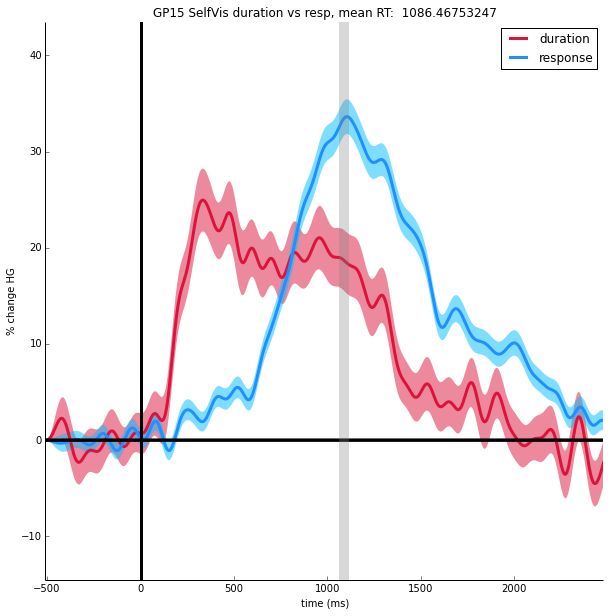

In [311]:
#plot
f, ax = plt.subplots(figsize = (10,10))
scale_min = min(cdata_dur.min(), cdata_resp.min()) - 10
scale_max = max(cdata_dur.max(), cdata_resp.max()) + 10
tmp = (np.arange(scale_min, scale_max))

ax.plot(np.arange(bl_st, len(cdata_dur)+bl_st), cdata_dur, zorder = 1, linewidth = 3, label = 'duration', color = 'crimson')
ax.fill_between(np.arange(bl_st, len(cdata_dur)+bl_st), cdata_dur+sem_dur, cdata_dur-sem_dur, alpha = 0.5, zorder = 0, edgecolor = 'None', facecolor = 'crimson')
ax.plot(np.arange(bl_st, len(cdata_dur)+bl_st), np.zeros(len(cdata_dur)), color = 'k', linewidth = 3) #xaxis
ax.plot(np.zeros(tmp.size), tmp, color = 'k', linewidth = 3) #yaxis

ax.plot(np.arange(bl_st, len(cdata_resp)+bl_st), cdata_resp, zorder = 1, linewidth = 3, label = 'response', color = 'dodgerblue')
ax.fill_between(np.arange(bl_st, len(cdata_resp)+bl_st), cdata_resp+sem_resp, cdata_resp-sem_resp, alpha = 0.5, zorder = 0, edgecolor = 'None', facecolor = 'deepskyblue')
ax.plot(np.arange(bl_st, len(cdata_resp)+bl_st), np.zeros(len(cdata_resp)), color = 'k', linewidth = 3) #xaxis
ax.plot(np.zeros(tmp.size), tmp, color = 'k', linewidth = 3) #yaxis

ax.plot(np.tile(RTs_mean,tmp.size), tmp, color = 'gray', linewidth = 10, alpha = 0.3) #mean RT


ax.legend()

ax.set_ylabel('% change HG')
ax.set_xlabel('time (ms)')
ax.autoscale(tight=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_title(' '.join([subj, task, 'duration vs resp, mean RT: ', str(RTs_mean)]))
plt.savefig(os.path.join(SJdir, 'PCA', 'figs_for_Bob', ''.join([subj, '_', task, '_dur_vs_resp_smoothed.png'])), dpi = 100)
#plt.close()

In [77]:
cdata_dur.shape

(4958,)

## bandpass filter data

In [237]:
from scipy.signal import butter, lfilter, freqz


In [238]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [239]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y